# 📌 Objective

### This notebook focuses on transforming raw housing data into a clean, machine-learning-ready dataset by handling:

* Missing values
* Outliers
* Feature scaling
* Train-test split

### Import libraries

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Load dataset

In [4]:
df = pd.read_csv("House Price India.csv")
df.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000


### Outlier treatment - Boxplot (Area vs Price)

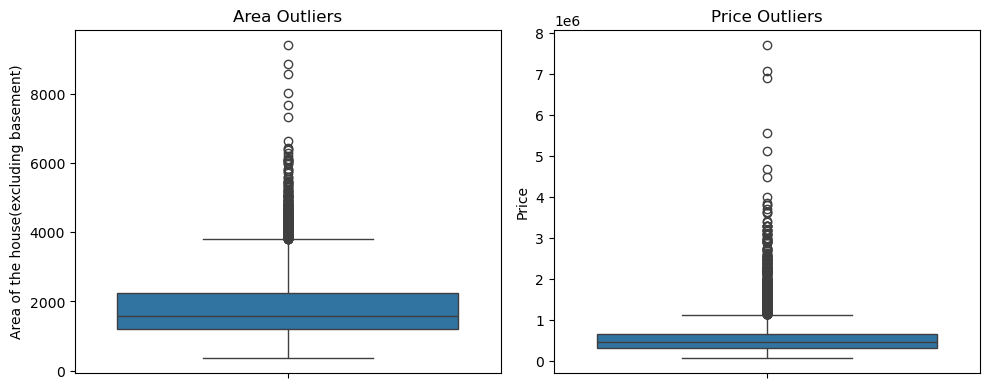

In [7]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.boxplot(y=df["Area of the house(excluding basement)"])
plt.title("Area Outliers")

plt.subplot(1,2,2)
sns.boxplot(y=df["Price"])
plt.title("Price Outliers")

plt.tight_layout()
plt.show()

### Capping outliers

In [9]:
def cap_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower, upper)

cap_outliers("Area of the house(excluding basement)")
cap_outliers("Price")

### Feature selection

In [11]:
X = df[["Area of the house(excluding basement)"]]
y = df["Price"]

### Train-Test split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

X_train.shape, X_test.shape

((10233, 1), (4386, 1))

### Feature scaling

In [14]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Preprocessing summary

- No missing values in the dataset
- Outliers capped using IQR method
- Relevant features selected
- Data split into training and testing sets
- Feature scaling applied